In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/HistoricalData_1713768621897.csv')

In [5]:
df

,Date,Close/Last,Volume,Open,High,Low
0,04/19/2024,$147.05,87074500,$148.97,$150.94,$146.22
1,04/18/2024,$149.93,96098830,$151.25,$152.20,$148.70
2,04/17/2024,$155.45,82439720,$157.64,$158.33,$153.78
3,04/16/2024,$157.11,96999960,$156.742,$158.19,$153.75
4,04/15/2024,$161.48,100245300,$170.24,$170.69,$161.38
...,...,...,...,...,...,...
1254,04/26/2019,$15.676,332267234,$16.4333,$16.4453,$15.4087
1255,04/25/2019,$16.5087,327350536,$17.00,$17.2667,$16.4047
1256,04/24/2019,$17.244,144855843,$17.59,$17.688,$17.20
1257,04/23/2019,$17.5933,163640168,$17.3433,$17.7067,$17.05


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1259 non-null   object
 1   Close/Last  1259 non-null   object
 2   Volume      1259 non-null   int64 
 3   Open        1259 non-null   object
 4   High        1259 non-null   object
 5   Low         1259 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.1+ KB


In [7]:
df.columns = ['Date', 'Close', 'Volume', 'Open', 'High', 'Low']

In [8]:
df.head(2)

,Date,Close,Volume,Open,High,Low
0,04/19/2024,$147.05,87074500,$148.97,$150.94,$146.22
1,04/18/2024,$149.93,96098830,$151.25,$152.20,$148.70


In [9]:
# prompt: id 컬럼을 만들되, "TSLA"로 값을 채워줘

df['id'] = "TSLA"
df.head(2)


,Date,Close,Volume,Open,High,Low,id
0,04/19/2024,$147.05,87074500,$148.97,$150.94,$146.22,TSLA
1,04/18/2024,$149.93,96098830,$151.25,$152.20,$148.70,TSLA


In [17]:
df['Close'] = df['Close'].str.replace('$', '').str.replace(',', '').astype(float)

In [18]:
df

,Date,Close,Volume,Open,High,Low,id
0,04/19/2024,147.0500,87074500,$148.97,$150.94,$146.22,TSLA
1,04/18/2024,149.9300,96098830,$151.25,$152.20,$148.70,TSLA
2,04/17/2024,155.4500,82439720,$157.64,$158.33,$153.78,TSLA
3,04/16/2024,157.1100,96999960,$156.742,$158.19,$153.75,TSLA
4,04/15/2024,161.4800,100245300,$170.24,$170.69,$161.38,TSLA
...,...,...,...,...,...,...,...
1254,04/26/2019,15.6760,332267234,$16.4333,$16.4453,$15.4087,TSLA
1255,04/25/2019,16.5087,327350536,$17.00,$17.2667,$16.4047,TSLA
1256,04/24/2019,17.2440,144855843,$17.59,$17.688,$17.20,TSLA
1257,04/23/2019,17.5933,163640168,$17.3433,$17.7067,$17.05,TSLA


In [19]:
# prompt: open컬럼, high컬럼, low컬럼에 값을, $제거하고 숫자로 바꿔줘

df['Open'] = df['Open'].str.replace('$', '').str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace('$', '').str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace('$', '').str.replace(',', '').astype(float)
df.head(2)


,Date,Close,Volume,Open,High,Low,id
0,04/19/2024,147.05,87074500,148.97,150.94,146.22,TSLA
1,04/18/2024,149.93,96098830,151.25,152.20,148.70,TSLA


In [20]:
df.to_csv('TSLA_2.csv', index=False)

In [21]:
from prophet import Prophet

In [22]:
prophet = Prophet()

In [25]:
df_prophet = df[['Date','High']]

In [27]:
df_prophet.columns = [ 'ds', 'y']

In [28]:
df_prophet.head(2)

,ds,y
0,04/19/2024,150.94
1,04/18/2024,152.20


In [29]:
prophet.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcnow0o3a/5mdkctsh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcnow0o3a/s4avyvx8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41455', 'data', 'file=/tmp/tmpcnow0o3a/5mdkctsh.json', 'init=/tmp/tmpcnow0o3a/s4avyvx8.json', 'output', 'file=/tmp/tmpcnow0o3a/prophet_model707sqozn/prophet_model-20240422075230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
future = prophet.make_future_dataframe(periods= 90, freq='B')

In [31]:
future

,ds
0,2019-04-22
1,2019-04-23
2,2019-04-24
3,2019-04-25
4,2019-04-26
...,...
1344,2024-08-19
1345,2024-08-20
1346,2024-08-21
1347,2024-08-22


In [32]:
future.tail(15)

,ds
1334,2024-08-05
1335,2024-08-06
1336,2024-08-07
1337,2024-08-08
1338,2024-08-09
1339,2024-08-12
1340,2024-08-13
1341,2024-08-14
1342,2024-08-15
1343,2024-08-16


In [33]:
forecast = prophet.predict(future)

In [34]:
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-04-22,16.147461,-30.932917,51.135609,16.147461,16.147461,-7.070281,-7.070281,-7.070281,0.653885,0.653885,0.653885,-7.724166,-7.724166,-7.724166,0.0,0.0,0.0,9.077180
1,2019-04-23,16.158476,-34.157400,49.782966,16.158476,16.158476,-8.055893,-8.055893,-8.055893,-0.275241,-0.275241,-0.275241,-7.780652,-7.780652,-7.780652,0.0,0.0,0.0,8.102582


In [35]:
import matplotlib.pyplot as plt

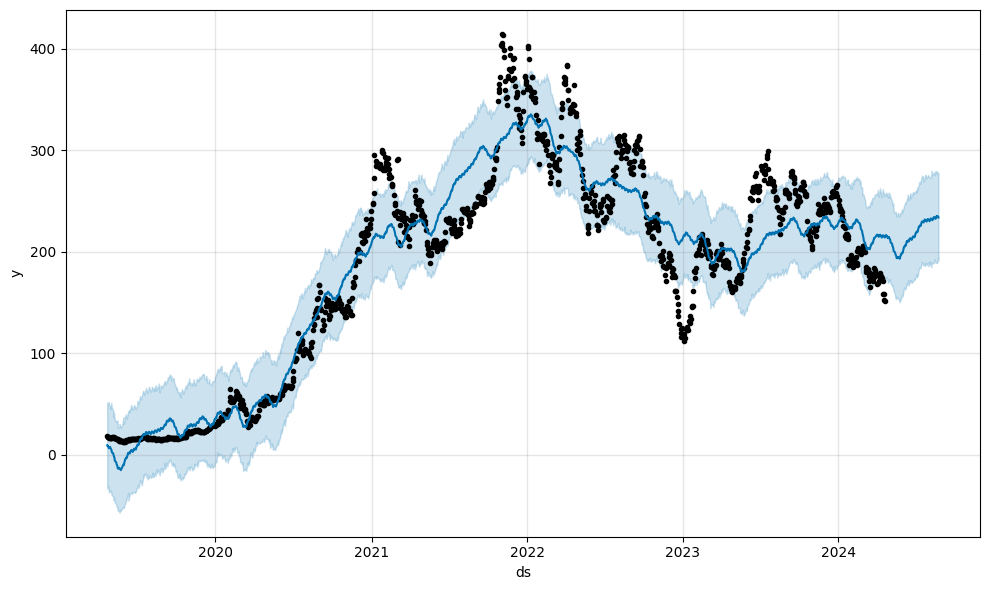

In [36]:
prophet.plot(forecast)
plt.savefig('prophet1.png')

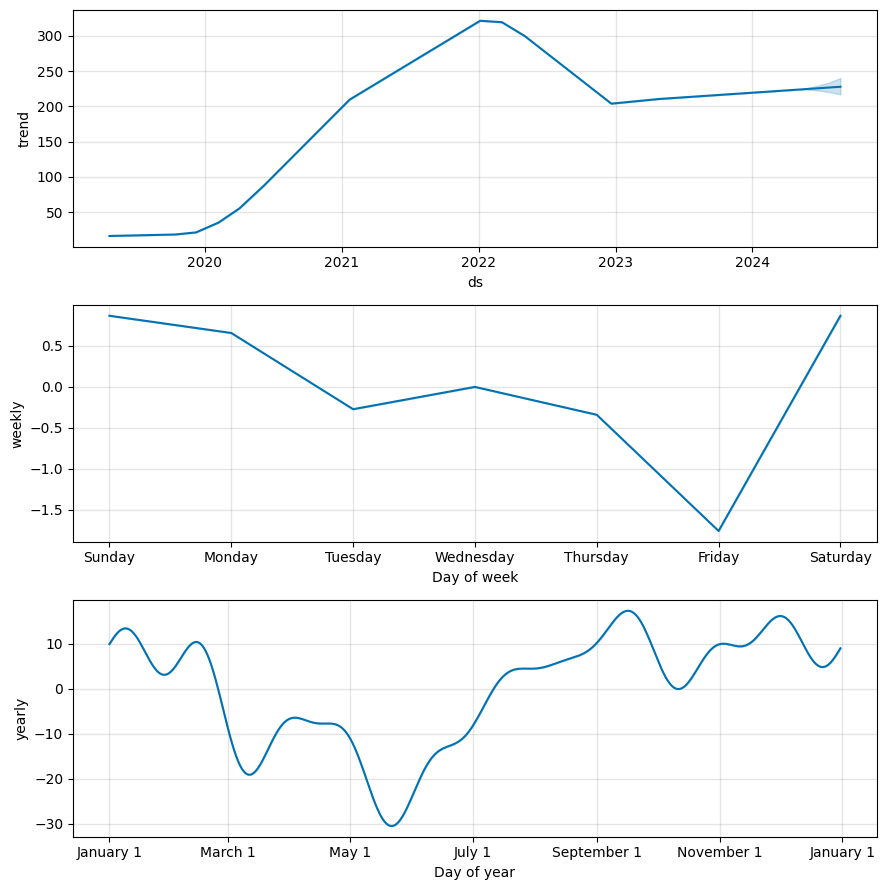

In [37]:
prophet.plot_components(forecast)
plt.savefig('prophet2.png')